# Classifications hiérarchiques

In [1]:
# Code Python
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

np.random.seed(123)

variables = ['A','B','C','X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4','ID_5','ID_6',
          'ID_7','ID_8','ID_9','ID_10']

X = np.random.random_sample([len(labels),len(variables)])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,A,B,C,X,Y,Z
ID_0,6.964692,2.861393,2.268515,5.513148,7.194690,4.231065
ID_1,9.807642,6.848297,4.809319,3.921175,3.431780,7.290497
ID_2,4.385722,0.596779,3.980443,7.379954,1.824917,1.754518
ID_3,5.315514,5.318276,6.344010,8.494318,7.244553,6.110235
ID_4,7.224434,3.229589,3.617887,2.282632,2.937140,6.309761
ID_5,0.921049,4.337012,4.308628,4.936851,4.258303,3.122612
ID_6,4.263513,8.933892,9.441600,5.018367,6.239530,1.156184
ID_7,3.172855,4.148262,8.663092,2.504554,4.830343,9.855598
ID_8,5.194851,6.128945,1.206287,8.263408,6.030601,5.450680
ID_9,3.427638,3.041208,4.170222,6.813008,8.754568,5.104223


In [2]:
from scipy.spatial.distance import pdist,squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10
ID_0,0.000000,7.515813,7.291294,6.147102,5.908280,7.283425,10.307123,10.158830,5.034288,4.587465,6.284267
ID_1,7.515813,0.000000,10.693828,7.856166,5.007880,10.228137,10.161800,8.758121,7.985670,9.852989,9.346920
ID_2,7.291294,10.693828,0.000000,8.850425,7.943009,6.313700,11.170073,11.594865,8.431215,8.154213,9.108111
ID_3,6.147102,7.856166,8.850425,0.000000,8.521560,7.410542,7.836414,8.189719,5.387945,4.426452,5.873941
ID_4,5.908280,5.007880,7.943009,8.521560,0.000000,7.770742,10.962260,7.675921,8.026113,8.400971,9.703415
ID_5,7.283425,10.228137,6.313700,7.410542,7.770742,0.000000,8.151657,8.697356,7.122349,5.970293,8.079069
ID_6,10.307123,10.161800,11.170073,7.836414,10.962260,8.151657,0.000000,10.425101,10.274831,9.399096,5.780188
ID_7,10.158830,8.758121,11.594865,8.189719,7.675921,8.697356,10.425101,0.000000,10.845452,8.832567,11.553433
ID_8,5.034288,7.985670,8.431215,5.387945,8.026113,7.122349,10.274831,10.845452,0.000000,5.575461,7.556781
ID_9,4.587465,9.852989,8.154213,4.426452,8.400971,5.970293,9.399096,8.832567,5.575461,0.000000,6.425987


In [3]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  app.launch_new_instance()


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,3.0,9.0,7.167666,2.0
cluster 2,0.0,8.0,7.769408,2.0
cluster 3,1.0,4.0,8.416614,2.0
cluster 4,11.0,12.0,9.760483,4.0
cluster 5,2.0,5.0,10.348596,2.0
cluster 6,6.0,10.0,10.529093,2.0
cluster 7,7.0,13.0,13.599170,3.0
cluster 8,14.0,15.0,14.962794,6.0
cluster 9,16.0,18.0,17.737253,8.0
cluster 10,17.0,19.0,18.345150,11.0


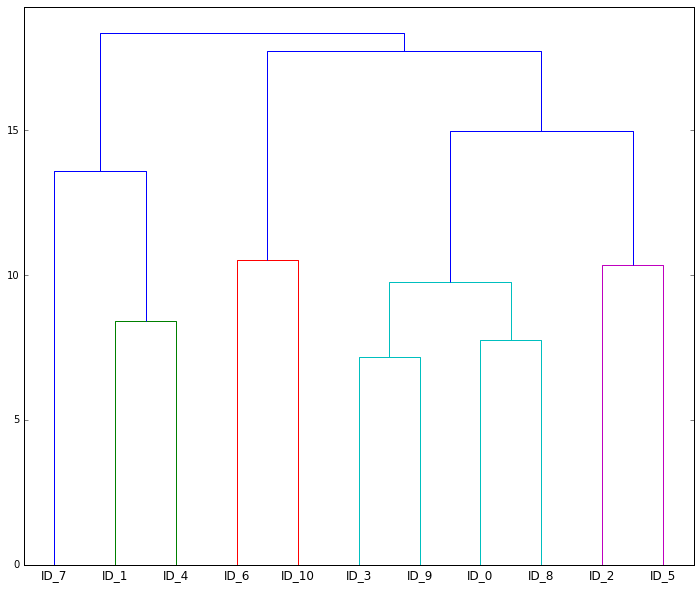

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize = (12, 10))
row_dendr = dendrogram(row_clusters, labels=labels)


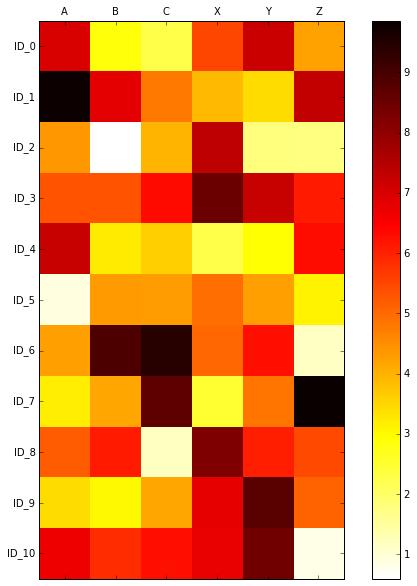

In [5]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111)

cax = ax.matshow(df, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.set_xticklabels([''] + list(df.columns))
ax.set_yticklabels([''] + list(df.index))

plt.show()


/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


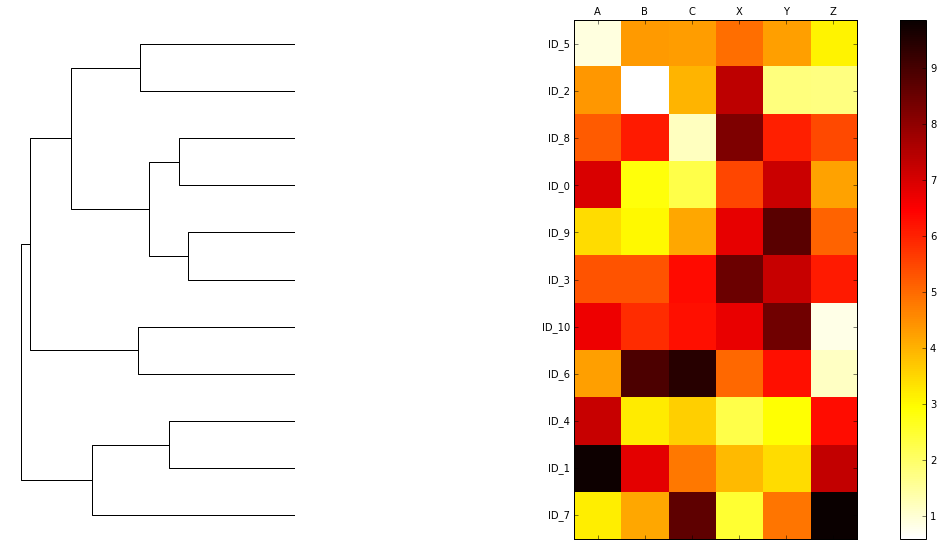

In [6]:
from scipy.cluster import hierarchy
# makes dendrogram black (1)
hierarchy.set_link_color_palette(['black'])

# plot row dendrogram
fig = plt.figure(figsize=(20,12))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left', 
                   color_threshold=np.inf, ) # makes dendrogram black (2))

# reorder data with respect to clustering
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# reorder rows with respect to the clustering
df_rowclust = df.ix[row_dendr['leaves'][::-1]]
        
# plot heatmap
axm = fig.add_axes([0.20, 0.1, 0.6, 0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

tick_spacing = 1
axm.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axm.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show()



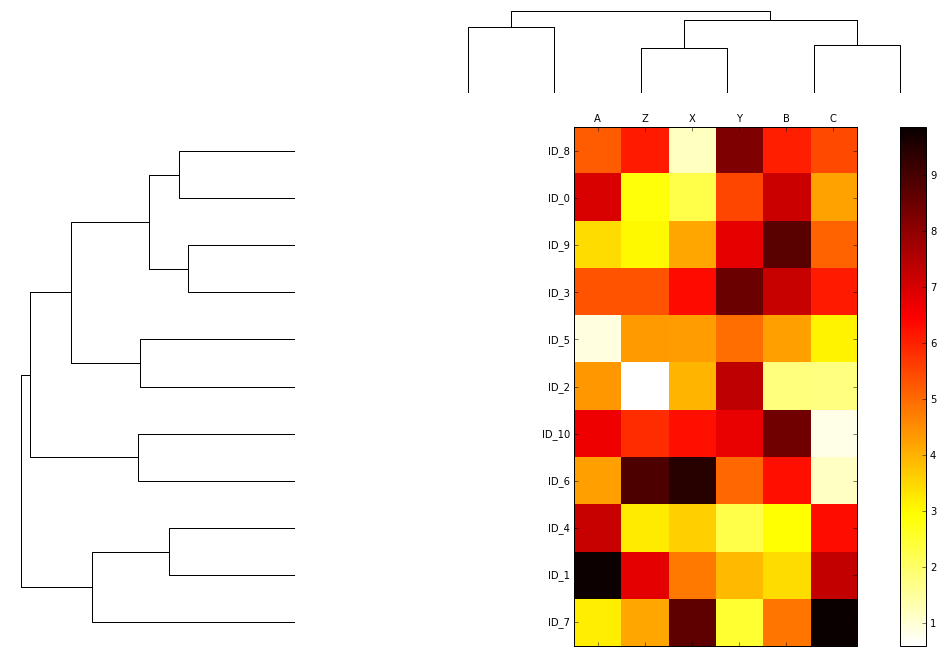

In [7]:
# Compute pairwise distances for columns
col_dists = pdist(df.T, metric='euclidean')
col_clusters = linkage(col_dists, method='complete')

# plot column dendrogram
fig = plt.figure(figsize=(20,12))

axd2 = fig.add_axes([0.38,0.74,0.36,0.10]) 
col_dendr = dendrogram(col_clusters, orientation='top',
                       color_threshold=np.inf) # makes dendrogram black)
axd2.set_xticks([])
axd2.set_yticks([])

# plot row dendrogram
axd1 = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left',  
                       count_sort='ascending',
                       color_threshold=np.inf) # makes dendrogram black
axd1.set_xticks([])
axd1.set_yticks([])

# remove axes spines from dendrogram
for i,j in zip(axd1.spines.values(), axd2.spines.values()):
        i.set_visible(False)
        j.set_visible(False)
        

# reorder columns and rows with respect to the clustering
df_rowclust = df.ix[row_dendr['leaves'][::-1]]
df_rowclust.columns = [df_rowclust.columns[col_dendr['leaves']]]

# plot heatmap
axm = fig.add_axes([0.20,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

tick_spacing = 1
axm.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axm.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show()